<a href="https://colab.research.google.com/github/aabarzu/Coding-Dojo/blob/main/ActividadGraficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.   Cargue la información de dicho archivo en un dataframe pandas.
2.   Con la información extraída, genere un histograma de las notas del curso, mostrando en texto en el gráfico la media y la desviación estándar.
3.   Ordene las notas y genere un gráfico (el que ud estime conveniente) de las notas ordenadas de menor a mayor.
4.   Genere dos gráficos de torta en una misma figura, mostrando el porcentaje de hombres y mujeres en el curso a la izquierda, y a la derecha el porcentaje de aprobados y reprobados.







# **1.   Cargue la información de dicho archivo en un dataframe pandas.**

In [200]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True) #  force_remount=True , pide eso no sé porqué
import pandas as pd

filename = '/content/drive/MyDrive/CodingDojo/DataScience/PandasForDataManipulation/Datos/notas-genero.csv'     # csv

df = pd.read_csv(filename, sep='\t')   # csv
#,skiprows = 4 --> Saltar filas del archivo y comenzar más abao

df 

Mounted at /content/drive


,Nombre,Nota,Genero
0,SEBASTIÁN ISRAEL,79,M
1,DANIEL ANTONIO,67,M
2,CRISTIAN ALBERTO,78,M
3,MARÍA GABRIELA,54,F
4,JOSÉ ANTONIO,79,M
5,BRAYAN ANDRÉS,75,M
6,TOMÁS FERNANDO,68,M
7,CHRISTIAN GABRIEL,76,M
8,LUIS FELIPE,78,M
9,OSCAR IGNACIO,57,M


In [201]:
df.describe()

,Nota
count,25.00000
mean,70.00000
std,14.71677
min,16.00000
25%,66.00000
50%,73.00000
75%,79.00000
max,86.00000


# **2.- Con la información extraída, genere un histograma de las notas del curso, mostrando en texto en el gráfico la media y la desviación estándar**

In [202]:
# Librerias para graficar
import matplotlib.pyplot as plt

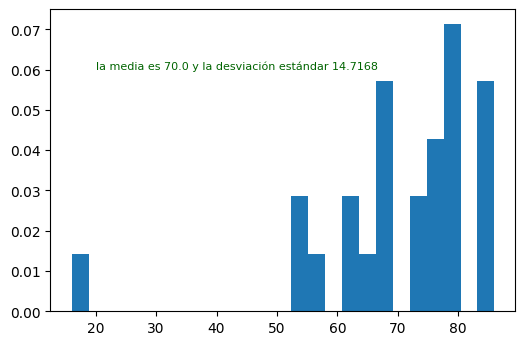

In [208]:
data_Nota = df['Nota'].sort_values()
media     = df['Nota'].mean()
dts       = round(df['Nota'].std() , 4)

fig1 = plt.figure(dpi=100)
ax1  = fig1.add_subplot(1,1,1)
ax1.text(20,0.06, f"La media es {media} y la desviación estándar {dts}", color="darkgreen", fontsize=8)
ax1.hist(data_Nota, data_Nota.count() , density=True)
plt.show()


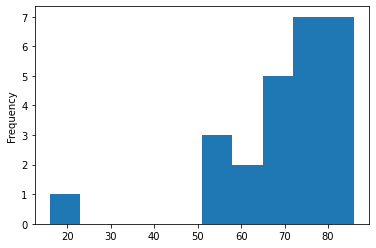

In [213]:
#Estilo Leik ( La librería plot viene integrada en Pandas) Ley del Mínimo esfuerzo (Menos es Más , simple es mejor)
df['Nota'].sort_values().plot.hist();


# **3.-Ordene las notas y genere un gráfico (el que ud estime conveniente) de las notas ordenadas de menor a mayor.**

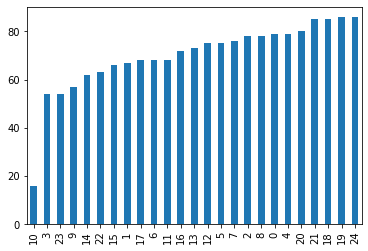

In [190]:
#Estilo Leik ( La librería plot viene integrada en Pandas) Ley del Mínimo esfuerzo (Menos es Más , simple es mejor)
df['Nota'].sort_values().plot.bar();


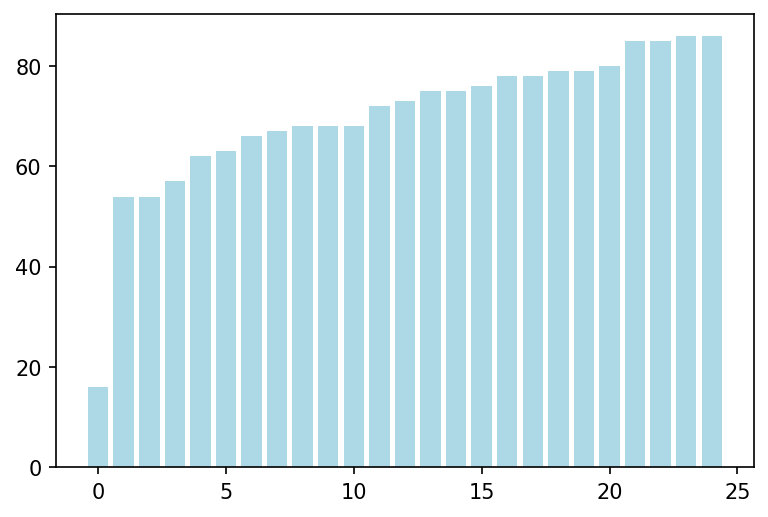

In [191]:
#Estilo Normal AA

import matplotlib.pyplot as plt #from matplotlib import pyplot as plt


data_Nota = df['Nota'].sort_values(ignore_index=True) #ignore_index=True crea un indice nuevo 
plt.figure(dpi=150) #resolución de figura (implica tamaño)
plt.bar(data_Nota.index,data_Nota.values, color='lightblue')
plt.show()

# **3. Genere dos gráficos de torta en una misma figura, mostrando el porcentaje de hombres y mujeres en el curso a la izquierda, y a la derecha el porcentaje de aprobados y reprobados.**

<Figure size 720x480 with 0 Axes>

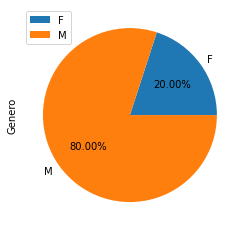

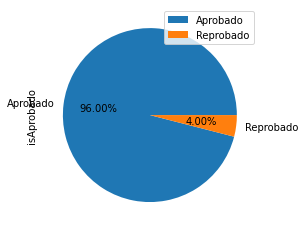

In [222]:
#Estilo Leik ( La librería plot viene integrada en Pandas) Ley del Mínimo esfuerzo (Menos es Más , simple es mejor)
fig1 = plt.figure(dpi=120)

(df.groupby(['Genero'])[['Genero']].count()).plot.pie(subplots=True, autopct="%.2f%%");



df2=df.copy()
df2.loc[ df2['Nota'] < 50  , ['isAprobado'] ] = 'Reprobado'
df2.loc[ df2['Nota'] >= 50 , ['isAprobado'] ] = 'Aprobado'

(df2.groupby(['isAprobado'])[['isAprobado']].count()).plot.pie(subplots=True, autopct="%.2f%%");


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


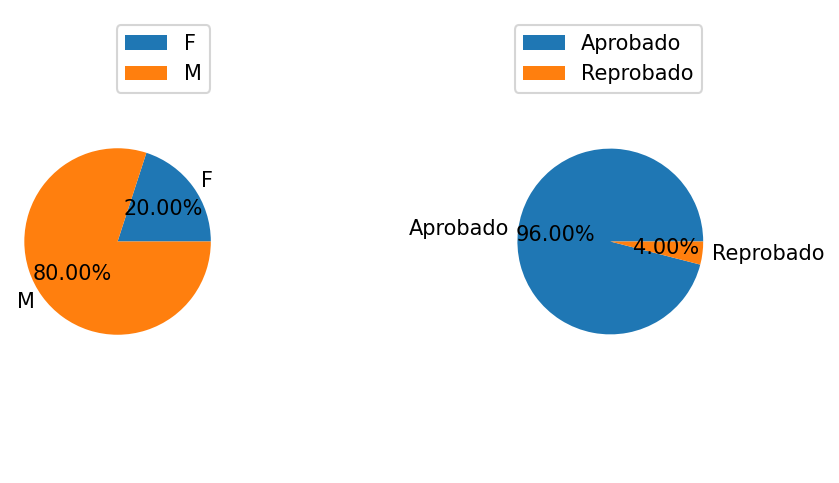

In [228]:
#Estilo Normal AA
import numpy as np

data_pie1 = (df.groupby(['Genero'])[['Nota']].count()).copy() 

fig1 = plt.figure(dpi=150)

ax1 = fig1.add_subplot(1,3,1); 
ax1.pie( np.array(data_pie1.values), labels=np.array(data_pie1.index) , autopct="%.2f%%", shadow = False );
ax1.legend()
ax1.axis("equal");

df2=df.copy()

df2.loc[ df2['Nota'] < 50  , ['isAprobado'] ] = 'Reprobado'
df2.loc[ df2['Nota'] >= 50 , ['isAprobado'] ] = 'Aprobado'

data_pie2 = df2.groupby(['isAprobado'])[['Nombre']].count()

ax2 = fig1.add_subplot(1,3,3) ;
ax2.pie( np.array(data_pie2.values), labels=np.array(data_pie2.index) , autopct="%.2f%%", shadow = False );
ax2.legend()
ax2.axis("equal");

plt.show();